# LightGBM

## LightGBM 장단점
- XGB보다도 학습에 걸리는 시간이 훨씬 적으며 메모리 사용량도 상대적으로 적다.
- 카테고리형 피처를 자동 변환하고, 예측 성능 역시 XGB와 큰 차이가 없다.
- 데이터의 갯수가 적을 경우 과적합이 발생하기 쉽다.
- 적은 데이터의 갯수에 대한 기준은 애매하지만 LightGBM의 공식문서에서 10,000건 이하라고 기술하였다.

## 트리 기반 알고리즘 특징
- 기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할(Level Wise) 방식을 사용한다.
- 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 깊이가 최소화되며 과대적합에 보다 강한 구조를 가진다.
- 하지만 균형을 맞추기 위한 시간이 오래 걸리는 단점이 있다.

## LightGBM 특징
- LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용한다.
- 트리의 균형을 맞추지 않고 최대 손실값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하여 깊이가 증가하고 비대치적인 트리를 생성한다.
- 이렇게 생선된 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM의 구현 사상이다.

# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
from IPython.display import Image

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'D2coding')
mpl.rc('axes', unicode_minus = False)

sns.set_style('darkgrid')
plt.rc('figure', figsize = (10, 8))

warnings.filterwarnings('ignore')

# 데이터 로딩과 훈련세트와 테스트세트 분리

In [5]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(True)

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

evals = [(X_test, y_test)]

# 학습
lgbm = LGBMClassifier(n_estimators = 4000)
lgbm.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', 
        eval_set = evals, verbose = True) # verbose는 출력값을 띄우는 파라미터

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

LGBMClassifier(n_estimators=4000)

## 예측과 평가

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer


In [63]:
# 평가지표 분류
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.
          format(accuracy, precision, recall, f1, roc_auc))
    
# 재현율과 정밀도의 시각화
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (14, 10))
    plt.rc('font', family = 'D2coding')
    threshold_boundary = thresholds.shape[0]
    a = thresholds[precisions[0:threshold_boundary] == recalls[0:threshold_boundary]]
    loc = np.where(thresholds == a[0])[0][0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    plt.scatter(thresholds[loc], precisions[loc], c = 'black', s = 60)
    plt.text(0.02 + thresholds[loc], precisions[loc], '임계값 : {:.3f}'.format(thresholds[loc]), size = 25)
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2), size = 20)
    plt.xlabel('Threshold value', size = 20); plt.ylabel('Precision and Recall value', size = 20)
    plt.legend()
    plt.rc('legend', fontsize = 20)
    plt.rc('ytick', labelsize = 20)
    plt.show()
    

# 임계값 조정 함수
def get_clf_eval_thres(y_test, pred_po, threshold, f1_show=False, auc_show=False):
    eval_df = pd.DataFrame()
    
    for thres in threshold:
        # threshold에 따른 예측 분류 값
        binarizer = Binarizer(threshold = thres)
        binarizer.fit(pred_po)
        thres_pred = binarizer.transform(pred_po)
        
        # 평가지표  
        accuracy = accuracy_score(y_test, thres_pred)
        precision = precision_score(y_test, thres_pred)
        recall = recall_score(y_test, thres_pred)
        f1 = f1_score(y_test, thres_pred)
        auc = roc_auc_score(y_test, pred_po)
        
        # 데이터 프레임 형태
        eval_lst = np.array([accuracy, precision, recall, f1, auc]).reshape(-1,1)
        temp = pd.DataFrame(eval_lst, columns=[thres], 
                            index = ["정확도", "정밀도", "재현율", "F1스코어", "AUC"])
        eval_df = pd.concat([eval_df,temp], axis=1)
        
    eval_df.columns.names = ["임계값"]
    
    if f1_show == False:
        eval_df.drop("F1스코어", axis=0, inplace=True)
        
    if auc_show == False:
        eval_df.drop("AUC", axis=0, inplace=True)
        
    return round(eval_df, 4)

In [55]:
# 오차행렬과 평가
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:, 1]
pred_proba_po = lgbm.predict_proba(X_test)[:, 1].reshape(-1, 1)

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율 : 0.9870, F1 : 0.9682, AUC : 0.9905


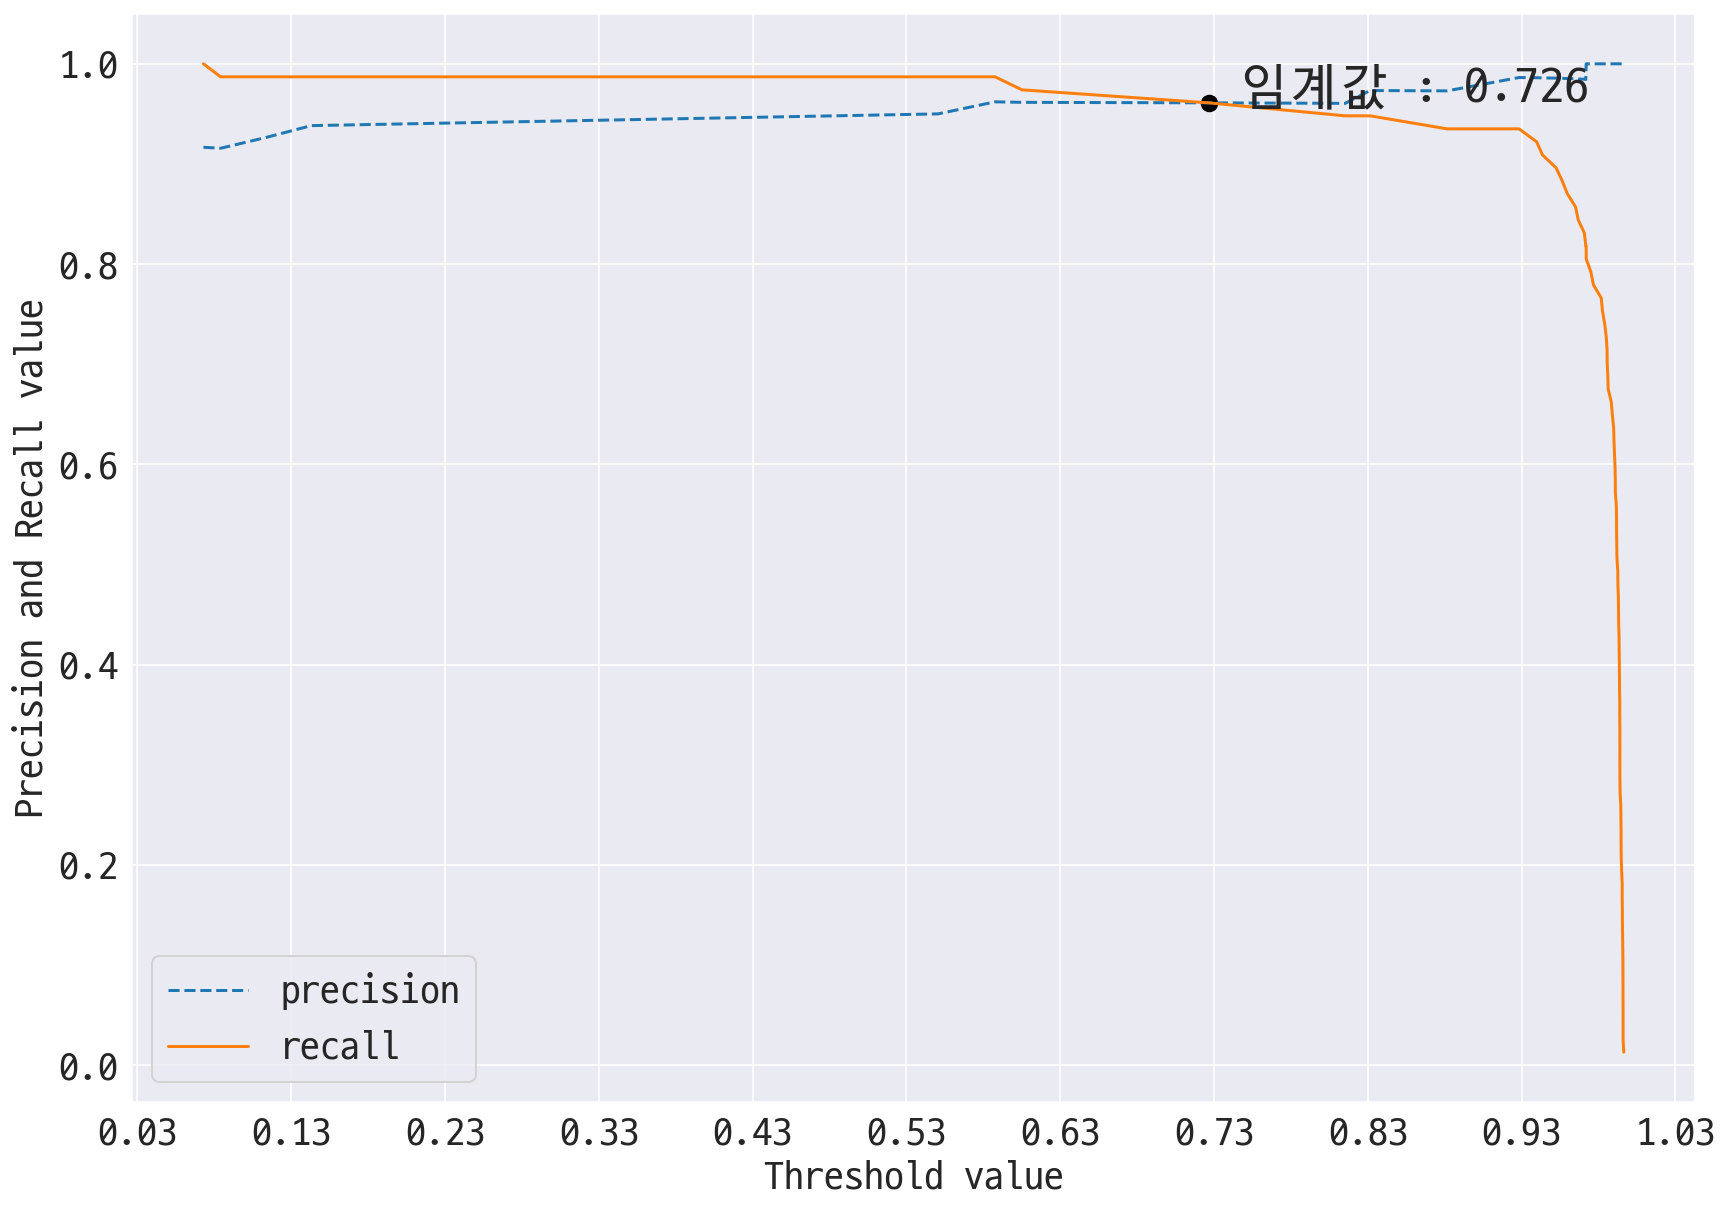

In [64]:
precision_recall_curve_plot(y_test, pred_proba)

In [61]:
thres_list = [0.3, 0,33, 0,36, 0,39, 0.42, 0.45, 0.48, 0.5]
get_clf_eval_thres(y_test, pred_proba_po, thres_list, f1_show=True, auc_show=True)

임계값,0.30,0.00,33.00,0.00,36.00,0.00,39.00,0.42,0.45,0.48,0.50
정확도,0.9561,0.6754,0.3246,0.6754,0.3246,0.6754,0.3246,0.9561,0.9561,0.9561,0.9561
정밀도,0.9500,0.6754,0.0000,0.6754,0.0000,0.6754,0.0000,0.9500,0.9500,0.9500,0.9500
재현율,0.9870,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.9870,0.9870,0.9870,0.9870
F1스코어,0.9682,0.8063,0.0000,0.8063,0.0000,0.8063,0.0000,0.9682,0.9682,0.9682,0.9682
AUC,0.9905,0.9905,0.9905,0.9905,0.9905,0.9905,0.9905,0.9905,0.9905,0.9905,0.9905


In [66]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', \
                    solver='sgd', alpha=0.01, batch_size=32, \
                    learning_rate_init=0.1, max_iter=500)
1
2

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (C:\Ananconda3\lib\site-packages\sklearn\base.py)